# Project 1 - Airbnb Seattle

**Business Understanding**
<br>
<br>
This workbook is part of project 1 of my Udacity Data Science Nano Degree I am completing. I was asked to select a dataset from three available options, completd some analysis with it answering three questions. The questions I chose can be found below. I then was tasked with writing a blog post with my findings which can be found here - [link](https://medium.com/@susiecrone93/booking-the-best-holiday-in-seattle-211e9764da17)

The data I chose to use is Seattle Airbnb Open Data found here on Kaggle. - [link](https://www.kaggle.com/datasets/airbnb/seattle/data)

The 3 questions:

<br> **Question One** - Are prices of available properties lower during seasons with higher available listings in Seattle?
<br> **Question Two** - How does the properties cancellation policy affect their reviews? Do properties with a stricter cancellation policy have better reviews?
<br> **Question Three** - Out of the properties available in Autumn or Spring, which are the 5 top ranked properties based on reviews we would recommend?

<br> **Answer One** - During Autumn and Spring, availability is higher and prices are lower. During summer you can see prices increasing drastically and availability dropping. In winter availability and prices are both much lower. This is the only time that the points both fall together. Could it suggest that in seattle some holiday let landlords close up for the winter?
When could be a good time to holiday in Seattle? - During Autumn or Spring
<br> **Answer Two** - The properties cancellation policy has very little effect on the review score. Properties with a more relaxed policy score slightly higher than those with stricter policies, but this is not enough to suggest a significance. I would advice that people booked based on the cancellation policy they are most confortable with.
<br> **Answer Three** - Above are the top 5 properties I would recommend checking out in Seattle, available in autumn and spring, based on the most reviewed and the highest reviewed.

**This workbook forms part of a project for my Udacity Data Science Nanodegree.**

**Load Required Packages**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

**Load Data**

In [3]:
calander_df = pd.DataFrame(pd.read_csv("F:/PDP/Nano_Degree/DataScience/Project_1/Data/calendar.csv"))
listings_df = pd.DataFrame(pd.read_csv("F:/PDP/Nano_Degree/DataScience/Project_1/Data/listings.csv"))
reviews_df = pd.DataFrame(pd.read_csv("F:/PDP/Nano_Degree/DataScience/Project_1/Data/reviews.csv"))

**Data Understanding**

In [4]:
calander_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
listings_df.head()

0              Stylish Queen Anne Apartment
1        Bright & Airy Queen Anne Apartment
2       New Modern House-Amazing water view
3                        Queen Anne Chateau
4            Charming craftsman 3 bdm house
5           Private unit in a 1920s mansion
6           Queen Anne Private Bed and Bath
7         Tiny Garden cabin on Queen Anne  
8          Urban Charm || Downtown || Views
9        Airy + Bright Queen Anne Apartment
10      Private Apartment - Queen Anne Hill
11         Upper Queen Anne Craftsman House
12       Open Plan 2bdr/1bath in Queen Anne
13          Elegance in Historic Queen Anne
14      Stunning 6 bd in THE BEST Location!
15          Lovely Queen Anne Cottage, 2 BR
16            Park Life in Lower Queen Anne
17           Private Garden Suite, Bay View
18         Queen Anne Getaway Near Seattle!
19       Grand Craftsman Home on Queen Anne
20              Queen Anne View One Bedroom
21        Cozy Queen Anne Finished Basement
22                   Lovely Quee

In [6]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


**Data Preparation**

**Question One**
<br> Are prices of available properties lower during seasons with higher available listings in Seattle?

In [7]:
#First look at average price of available properties by season

# Create season column, and turn to datetime
calander_df['season']= pd.to_datetime(calander_df['date'])

# Add season
calander_df['season']=calander_df.season.dt.month%12 // 3 + 1

# Add string column for seasons
calander_df['season_str']=calander_df['season'].replace(1, "Winter").replace(2, "Spring").replace(3, "Summer").replace(4, "Autumn")

In [8]:
#Eyeball the dates look in-line with the seasons
calander_df.groupby('season_str').date.max()
calander_df.groupby('season_str').date.min()

season_str
Autumn    2016-09-01
Spring    2016-03-01
Summer    2016-06-01
Winter    2016-01-04
Name: date, dtype: object

Checking for any NULLs in needed fields.
- Season 
- Price

In [9]:
#Do we have any NULLs?
calander_df.isnull().mean()

#Looks like we have NULLs in the price column. 

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
season        0.00000
season_str    0.00000
dtype: float64

In [10]:
#Are these NULLs only for listings that aren't available? 
calander_df[calander_df['available']=='t'].isnull().mean()

#Yes they are.

listing_id    0.0
date          0.0
available     0.0
price         0.0
season        0.0
season_str    0.0
dtype: float64

In [11]:
#Create dataframe with only available listings as this is what im interested in.
available_calander_df = pd.DataFrame(calander_df[calander_df['available']=='t'])

available_calander_df.head()

,listing_id,date,available,price,season,season_str
0,241032,2016-01-04,t,$85.00,1,Winter
1,241032,2016-01-05,t,$85.00,1,Winter
9,241032,2016-01-13,t,$85.00,1,Winter
10,241032,2016-01-14,t,$85.00,1,Winter
14,241032,2016-01-18,t,$85.00,1,Winter


In [12]:
#Make a float money field
available_calander_df['price_float'] = available_calander_df['price'].str.replace('$','').str.replace(',','').astype(float)                             

available_calander_df.head()

,listing_id,date,available,price,season,season_str,price_float
0,241032,2016-01-04,t,$85.00,1,Winter,85.0
1,241032,2016-01-05,t,$85.00,1,Winter,85.0
9,241032,2016-01-13,t,$85.00,1,Winter,85.0
10,241032,2016-01-14,t,$85.00,1,Winter,85.0
14,241032,2016-01-18,t,$85.00,1,Winter,85.0


In [13]:
mean=available_calander_df.groupby('season_str').price_float.mean().reset_index()

In [14]:
#Eyeball
mean

,season_str,price_float
0,Autumn,138.568122
1,Spring,134.319972
2,Summer,150.045546
3,Winter,128.902512


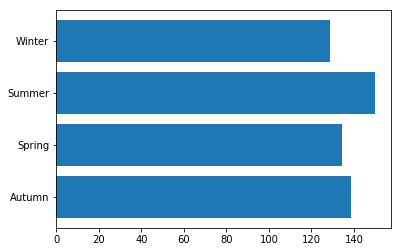

In [15]:
x = mean['season_str']
y = mean['price_float']


plt.barh(x,y)
plt.show()

In [16]:
cnt_available = available_calander_df.groupby('season_str').available.count().reset_index()

In [17]:
cnt_available

,season_str,available
0,Autumn,241464
1,Spring,239946
2,Summer,227813
3,Winter,225319


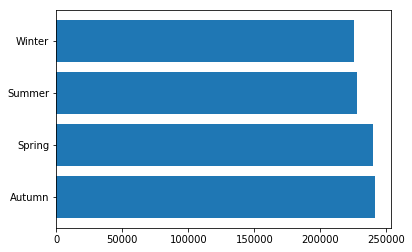

In [18]:
x = cnt_available['season_str']
y = cnt_available['available']


plt.barh(x,y)
plt.show()

In [19]:
#Combine Datasets
join = cnt_available.join(mean, lsuffix='season_str', rsuffix='season_str')
join

,season_strseason_str,available,season_strseason_str,price_float
0,Autumn,241464,Autumn,138.568122
1,Spring,239946,Spring,134.319972
2,Summer,227813,Summer,150.045546
3,Winter,225319,Winter,128.902512


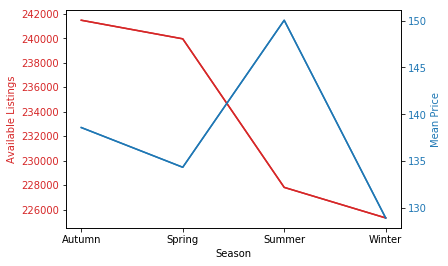

In [20]:
x = join['season_strseason_str']
y1 = join['available']
y2 = join['price_float']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Season')
ax1.set_ylabel('Available Listings', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Mean Price', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

**Findings** - During Autumn and Spring, availability is higher and prices are lower. During summer you can see prices increasing drastically and availability dropping. In winter availability and prices are both much lower. This is the only time that the points both fall together. Could it suggest that in seattle some holiday let landlords close up for the winter?

When could be a good time to holiday in Seattle? - During Autumn or Spring

**Question Two** - How does the properties cancellation policy affect their reviews? Do properties with a stricter cancellation policy have better reviews?

In [21]:
# Do properties with a stricted cancellation policy have better average reviews?
listing_review=listings_df.groupby('cancellation_policy').review_scores_rating.mean().reset_index()
listing_review

,cancellation_policy,review_scores_rating
0,flexible,94.810256
1,moderate,94.671958
2,strict,94.251392


In [22]:
#Do we have any NULLs in the review score?  - Yes around 17%
listings_df.review_scores_rating.isnull().mean()

#I am going to choose to ignore these listings as they are most likely listings that have not recieved any reviews yet so I do not want to take them in to account.

0.16946045049764275

In [23]:
#Removing nulls to check this isnt affecting our averages.
listings_df_nonull = listings_df.dropna(subset=['review_scores_rating'], axis=0) # dataframe with rows for nan review score ratings removed

#Check there are no nulls
listings_df_nonull.review_scores_rating.isnull().mean()

0.0

In [24]:
# Calculating again with no NULLs to check it isnt skewing our averages. You can see the figures are the same as above.
listing_review=listings_df_nonull.groupby('cancellation_policy').review_scores_rating.mean().reset_index()
listing_review

,cancellation_policy,review_scores_rating
0,flexible,94.810256
1,moderate,94.671958
2,strict,94.251392


[Text(0,0,'flexible'), Text(0,0,'moderate'), Text(0,0,'strict')]

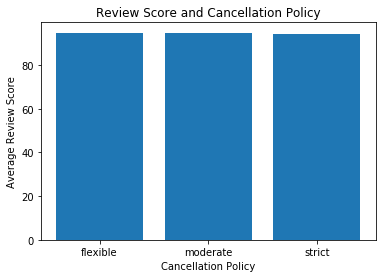

In [25]:
x = listing_review['cancellation_policy']
y = listing_review['review_scores_rating']

fig, ax = plt.subplots()
bar_container = ax.bar(x, y)
ax.set(ylabel='Average Review Score', xlabel = 'Cancellation Policy', title='Review Score and Cancellation Policy')
ax.set_xticks(x)
ax.set_xticklabels(x)

**Findings** - The properties cancellation policy has very little effect on the review score. Properties with a more relaxed policy score slightly higher than those with stricter policies, but this is not enough to suggest a significance. I would advice that people booked based on the cancellation policy they are most confortable with.

**Question Three** - Out of the properties available in Autumn or Spring, which are the 5 top ranked properties based on reviews we would recommend?

In [26]:
#Filter data to properties available in spring or autumn
spr_aut = available_calander_df.loc[(available_calander_df['season']==2) | (available_calander_df['season']==4)]

#Check
spr_aut.groupby('season').season_str.max()

season
2    Spring
4    Autumn
Name: season_str, dtype: object

In [27]:
# Dedup listing ID
available_listings = spr_aut['listing_id']

new_list = []

[new_list.append(item) for item in available_listings if item not in new_list]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [28]:
ids= pd.DataFrame(new_list)

In [29]:
#Which listings in listing table are available in spring and autumn.
#Combine Datasets
spr_aut = listings_df.join(ids, lsuffix='listing_id', rsuffix='ids', how='inner')

In [30]:
#Check counts, join should have some rows excluded. It does.
print(listings_df.shape)
print(spr_aut.shape)

(3818, 92)
(3538, 93)


In [31]:
spr_aut.sort_values('review_scores_rating', ascending=False).review_scores_rating

# Problem, I can see lot of review scores are 100. What happens if i sort it by most reviewed too. 

2273    100.0
3122    100.0
986     100.0
991     100.0
3156    100.0
994     100.0
995     100.0
997     100.0
1000    100.0
1001    100.0
1003    100.0
1005    100.0
2269    100.0
1008    100.0
1019    100.0
2266    100.0
1027    100.0
1028    100.0
1029    100.0
1032    100.0
1036    100.0
1037    100.0
1041    100.0
1045    100.0
3128    100.0
1052    100.0
1054    100.0
1057    100.0
3126    100.0
2261    100.0
        ...  
3383      NaN
3384      NaN
3386      NaN
3389      NaN
3391      NaN
3393      NaN
3396      NaN
3404      NaN
3405      NaN
3407      NaN
3418      NaN
3424      NaN
3431      NaN
3445      NaN
3446      NaN
3452      NaN
3453      NaN
3459      NaN
3463      NaN
3471      NaN
3487      NaN
3488      NaN
3492      NaN
3500      NaN
3510      NaN
3511      NaN
3519      NaN
3521      NaN
3535      NaN
3536      NaN
Name: review_scores_rating, Length: 3538, dtype: float64

In [36]:
# Problem, I can see lot of review scores are 100. What happens if i sort it by most reviewed per month, take the 100 most reviewed, then take the top 5 from their based on review score rating.
most_reviewed = spr_aut.sort_values('reviews_per_month', ascending=False).head(100)

most_reviewed.sort_values('review_scores_rating', ascending=False).head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,0
2783,9494415,https://www.airbnb.com/rooms/9494415,20160104002432,2016-01-04,403 Modern Studio on Capitol Hill,This is a modern fully-furnished studio apartm...,This is a fully-furnished studio designed for ...,This is a modern fully-furnished studio apartm...,none,"Close to downtown, Capitol Hill is one of Seat...",...,f,NaN,WASHINGTON,t,flexible,f,f,15,7.00,5632713
2107,5056580,https://www.airbnb.com/rooms/5056580,20160104002432,2016-01-04,Soaring Crane Luxury Garden Retreat,Gorgeous professionally-designed 850 square fo...,Welcome to my professionally designed luxury 8...,Gorgeous professionally-designed 850 square fo...,none,"North Beacon Hill is a very diverse, welcoming...",...,f,NaN,WASHINGTON,f,moderate,f,f,1,10.95,7411863
814,4757025,https://www.airbnb.com/rooms/4757025,20160104002432,2016-01-04,Charming and Private-AAA Location,Relax and enjoy your visit to Seattle in t...,This apartment is 1200 square feet and the ent...,Relax and enjoy your visit to Seattle in t...,none,Your location in the Harrison neighborhood i...,...,f,NaN,WASHINGTON,t,moderate,f,f,1,6.92,7808495
2791,9436832,https://www.airbnb.com/rooms/9436832,20160104002432,2016-01-04,Artsy Charmer in Center of Cap Hill,Cozy top floor studio centrally located - clos...,This is a top floor corner unit in an old worl...,Cozy top floor studio centrally located - clos...,none,I'm a leasing agent in Seattle and Cap Hill is...,...,f,NaN,WASHINGTON,t,moderate,f,f,2,7.32,9030406
1322,8637174,https://www.airbnb.com/rooms/8637174,20160104002432,2016-01-04,Charming Belltown Corner Studio,Historic renovated studio apartment that has 9...,This studio condo is in downtown Seattle right...,Historic renovated studio apartment that has 9...,none,Belltown is a great neighborhood and is at the...,...,f,NaN,WASHINGTON,t,moderate,f,f,3,9.47,1707064


**Findings** - Above are the top 5 properties I would recommend checking out in Seattle, available in autumn and spring, based on the most reviewed and the highest reviewed.

**Modelling and Evaluation**
<br>
<br>
I chose not to use modelling or model evaluation in my work, as the questions I picked were answered better with more basic statistical analysis rather than modelling. I wanted wanted to avoid using modelling when it does not add value to the project.
<br>
<br>
**Deployment**
<br>
<br>
The findings in this project were used to write a blog post which is published on Medium, titled How to book the best holiday in Seattle! Here - [link](https://medium.com/@susiecrone93/booking-the-best-holiday-in-seattle-211e9764da17)